# AirBnB data EDA: feature correlations

This correlation analysis builds upon the distribution analysis from the previous notebook to understand how features interact with each other.

## Notebook set-up

In [1]:
# Standard library imports
from itertools import product

# PyPI imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Internal imports
import gperdrizet_functions as funcs

## 1. Data loading
Load the same AirBnB dataset to analyze relationships between features.

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Nominal features

### 2.1. Neighborhood group vs room type

#### 2.1.1. Chi-squared test

Test for association between two categorical variables (neighbourhood_group and room_type) using the chi-squared test. This will help us understand if the distribution of room types varies significantly across different NYC boroughs.

In [4]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
chisquared_result=stats.chisquare(list(groups))
print(f'Chi-squared p-value = {chisquared_result.pvalue:.4f}')

Chi-squared p-value = 0.0000


#### 2.1.2. Stratified distribution plot

Visualize the relationship between neighbourhood_group and room_type using a stratified bar plot. This will show how the distribution of different room types varies across NYC's five boroughs, making the categorical association more interpretable.

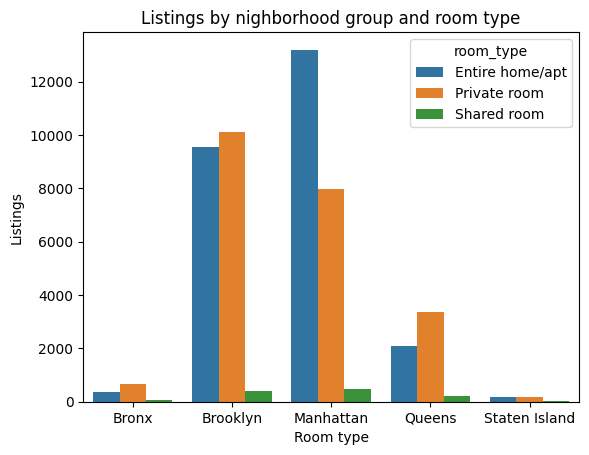

In [5]:
groups=data_df.groupby(['neighbourhood_group', 'room_type']).size()
groups_df=groups.reset_index()
groups_df.rename({0: 'Listings'}, axis=1, inplace=True)

plt.title('Listings by nighborhood group and room type')
sns.barplot(groups_df, x='neighbourhood_group', y='Listings', hue='room_type')
plt.xlabel('Room type')

plt.show()

The chi-squared test shows a significant association between neighbourhood group and room type (p < 0.05). The visualization reveals that Manhattan has a higher proportion of entire home/apartment listings, while other boroughs show more balanced distributions between room types.

### 2.2. Neighborhood group & room type vs interval features

#### 2.2.1. Kruskal–Wallis test for difference in means

Test for differences in numerical variable distributions across categorical groups using the Kruskal-Wallis H-test. This non-parametric test is appropriate since our numerical variables are not normally distributed, and it will identify which categorical-numerical relationships are statistically significant.

In [6]:
nominal_features=['neighbourhood_group','room_type']
numerical_features=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

htest_results={
    'Independent var':[],
    'Dependent var':[],
    'p-value':[],
    'H-statistic':[]
}

for numeric_feature in numerical_features:
    for nominal_feature in nominal_features:
        groups=[list(x) for _, x in data_df.dropna().groupby(data_df[nominal_feature])[numeric_feature]]
        result=stats.kruskal(*groups)

        htest_results['Independent var'].append(nominal_feature)
        htest_results['Dependent var'].append(numeric_feature)
        htest_results['p-value'].append(result.pvalue)
        htest_results['H-statistic'].append(result.statistic)

htest_results_df=pd.DataFrame.from_dict(htest_results)
htest_results_df.sort_values('p-value', ascending=True, inplace=True)
htest_results_df.reset_index(drop=True, inplace=True)

#### 2.2.2. Neighborhood group: stratified distribution plots

Visualize how numerical variables vary across neighbourhood groups using box plots. We'll use log scaling for highly skewed variables to better show the distributions and identify the most significant relationships from our statistical tests.

Kruskal-Wallis test resutls:

                     Dependent var        p-value   H-statistic
0                         latitude   0.000000e+00  25852.614173
1                        longitude   0.000000e+00  17514.312174
3                            price   0.000000e+00   5204.117119
7                 availability_365  8.474466e-194    901.354837
8                reviews_per_month  3.570323e-159    741.513226
9                   minimum_nights  2.829345e-145    677.325493
10  calculated_host_listings_count   3.721094e-91    427.179910
11               number_of_reviews   7.252508e-43    203.322493


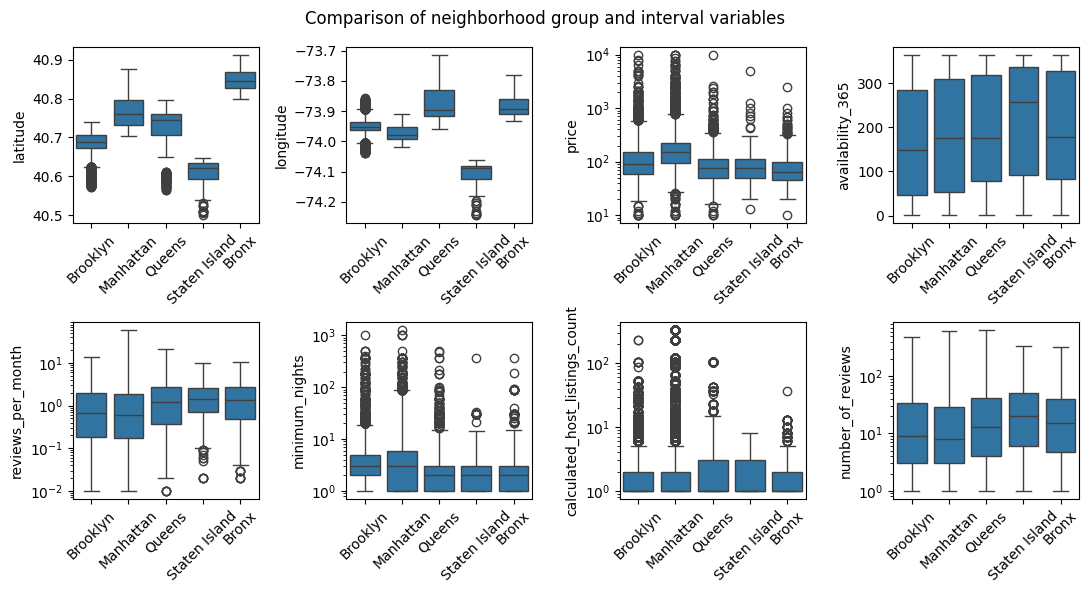

In [7]:
htest_results_subset_df=htest_results_df[htest_results_df['Independent var'] == 'neighbourhood_group']
features=htest_results_subset_df['Dependent var']

print('Kruskal-Wallis test resutls:\n')
print(htest_results_subset_df.drop('Independent var', axis=1).head(len(htest_results_subset_df)))

fig, axs=plt.subplots(2,4, figsize=(11,6))
axs=axs.flatten()

fig.suptitle('Comparison of neighborhood group and interval variables')

for i, feature in enumerate(features):

    plot_df=data_df[data_df[feature] != 0]

    if stats.kurtosis(plot_df[feature].dropna()) > 10:
        log_scale=True
    else:
        log_scale=False

    sns.boxplot(plot_df, x='neighbourhood_group', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

The Kruskal-Wallis tests reveal significant differences (p < 0.001) for most variables across neighbourhood groups. Key findings:
- **Price**: Manhattan shows highest median prices, Brooklyn/Queens are moderate, Bronx/Staten Island are lowest
- **Location coordinates**: Clearly separated by geography as expected
- **Availability**: Staten Island shows higher availability, suggesting less tourist demand
- **Reviews**: Manhattan properties tend to have more reviews, indicating higher turnover

#### 2.2.3. Room type: stratified distribution plots

Examine how numerical variables differ across room types using box plots. This analysis will reveal how listing characteristics like price, availability, and review patterns vary between entire homes, private rooms, and shared rooms.

                     Dependent var       p-value   H-statistic
2                        longitude  0.000000e+00   2015.714941
4                   minimum_nights  0.000000e+00   1954.348471
5                            price  0.000000e+00  18437.835426
6   calculated_host_listings_count  0.000000e+00   2255.123897
12                availability_365  2.246947e-31    141.141131
13               reviews_per_month  2.734189e-11     48.645203
14                        latitude  2.171564e-03     12.264615
15               number_of_reviews  5.534535e-03     10.393495


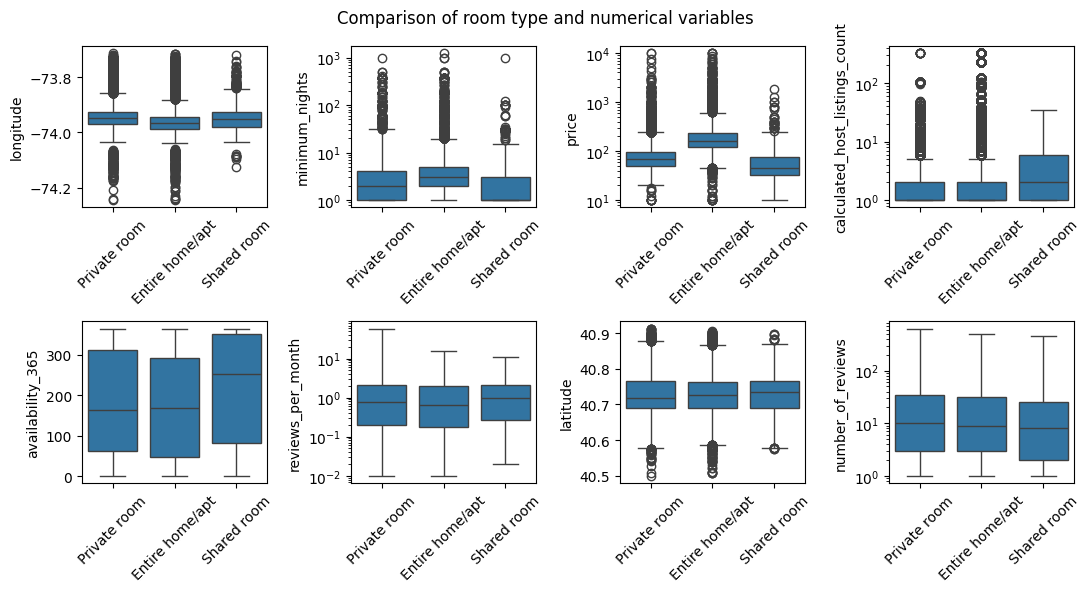

In [8]:
htest_results_subset_df=htest_results_df[htest_results_df['Independent var'] == 'room_type']
features=htest_results_subset_df['Dependent var']

print(htest_results_subset_df.drop('Independent var', axis=1).head(len(htest_results_subset_df)))

fig, axs=plt.subplots(2,4, figsize=(11,6))
axs=axs.flatten()

fig.suptitle('Comparison of room type and numerical variables')

for i, feature in enumerate(features):

    plot_df=data_df[data_df[feature] != 0]

    if stats.kurtosis(plot_df[feature].dropna()) > 10:
        log_scale=True
    
    else:
        log_scale=False

    sns.boxplot(plot_df, x='room_type', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

**Result**: Room type significantly affects multiple listing characteristics:
- **Price**: Entire homes command highest prices, shared rooms are cheapest (clear pricing hierarchy)
- **Minimum nights**: Entire homes often require longer stays, shared rooms are more flexible
- **Availability**: Shared rooms show higher availability, possibly due to lower demand
- **Host listings**: Hosts with entire homes tend to manage more properties (professional hosts)

## 3. Numerical features

### 3.1. Correlation coefficients

Calculate pairwise correlation coefficients between numerical features using Spearman rank correlation. This non-parametric approach is appropriate for our non-normally distributed data and will identify linear and monotonic relationships between variables.

In [9]:
# Features to calculate correlation coefficients for
features=[
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

# Calculate the correlation coefficients between each pair of features
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(features, features)))
correlations=funcs.get_correlations(feature_pairs, data_df)

# Sort by Spearman rank and inspect
correlations_df=pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Spearman', inplace=True, ascending=False)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Absolute Spearman,Spearman,Spearman p-value,Absolute Pearson,Pearson,Pearson p-value,Pearson r-squared
0,number_of_reviews,reviews_per_month,0.706208,0.706208,0.000000e+00,0.549868,0.549868,0.000000e+00,0.302354
1,availability_365,calculated_host_listings_count,0.406606,0.406606,0.000000e+00,0.225701,0.225701,0.000000e+00,0.050941
2,availability_365,reviews_per_month,0.392126,0.392126,0.000000e+00,0.185791,0.185791,1.147823e-298,0.034518
3,availability_365,number_of_reviews,0.236664,0.236664,0.000000e+00,0.172028,0.172028,2.430803e-321,0.029593
4,calculated_host_listings_count,reviews_per_month,0.146484,0.146484,3.120195e-185,-0.009421,-0.009421,6.334486e-02,0.000089
5,minimum_nights,price,0.101289,0.101289,1.158209e-111,0.042799,0.042799,2.853171e-21,0.001832
6,availability_365,price,0.086088,0.086088,4.413697e-81,0.081829,0.081829,2.056743e-73,0.006696
7,availability_365,minimum_nights,0.075981,0.075981,1.598557e-63,0.144303,0.144303,9.593642e-226,0.020823
8,calculated_host_listings_count,minimum_nights,0.064117,0.064117,1.027574e-45,0.127960,0.127960,1.485585e-177,0.016374
9,calculated_host_listings_count,number_of_reviews,0.056054,0.056054,2.476852e-35,-0.072376,-0.072376,8.610142e-58,0.005238


### 3.2. Scatter plots

Create scatter plots for the most significant correlations to visualize the relationships between numerical variables. This will help us understand the nature and strength of correlations beyond just the coefficients.

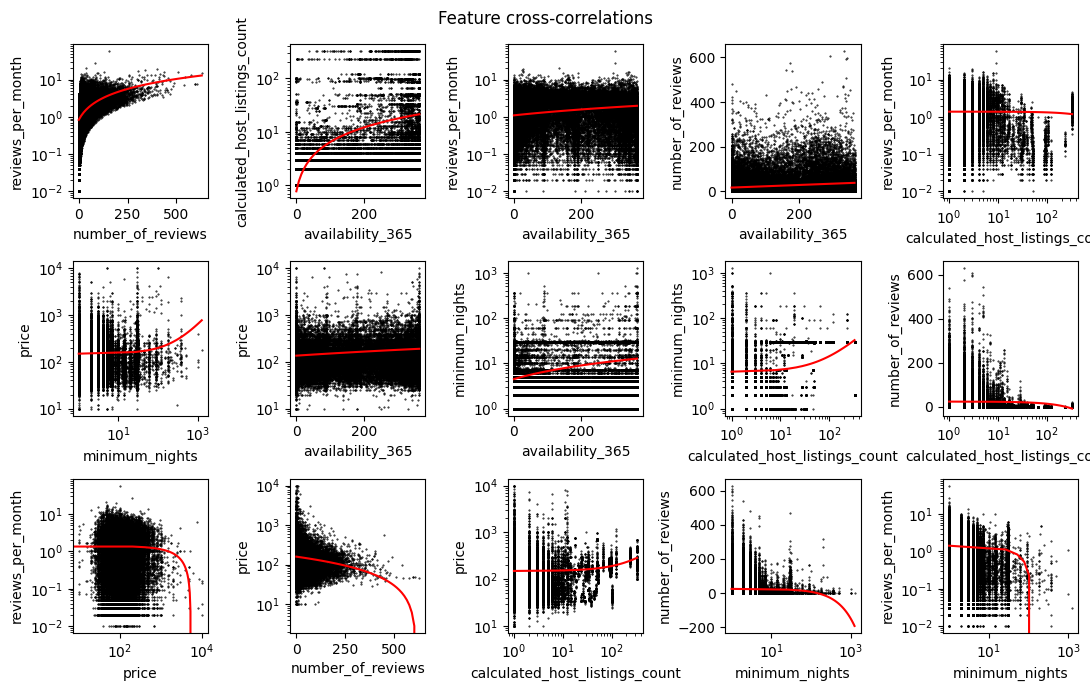

In [10]:
funcs.plot_correlations(data_df, correlations_df)

**Result**: The correlation analysis reveals several key relationships:
- **Strongest positive correlations**: Number of reviews with reviews per month (0.55) - more active listings get more reviews
- **Moderate correlations**: Price with location features - Manhattan locations command higher prices
- **Weak correlations**: Most other pairs show weak relationships, suggesting features are relatively independent
- **Implications**: The low correlations indicate minimal multicollinearity issues for modeling, which is beneficial for feature selection